Linear Regression <br>
=============== <br>
Dependant variable y is linearly correlated to independent X's = {x1,x2,x3----} <br>
$\hat{y} = w^TX+b $ Estimated target variable is $\hat{y} $<br>
w is the weight vector (coefficients of independent variables) <br>
b is the bias or intercept <br>

Error in the prediction is $(\hat{y}-y) $ <br>

Since absolute errors (Predicted - Actual) sum up to zero, we minimize the squared error <br>
$ Mean squared error (MSE) = \frac{1}m\sum \limits_{i=1}^m (\hat{y}-y)^2 $ <br>
To solve the above error we need to get the gradient of the function to near 0 <br>
$\nabla_w \frac{1}m\sum \limits_{i=1}^m (\hat{y}-y)^2 = 0 $ <br>
$\nabla_w ||Xw-y||^2 = 0 $ <br>
$\nabla_w (Xw-y)^T(Xw-y) = 0 $ <br>
$\nabla_w (w^TXXw - 2w^TX^Ty + y^Ty) = 0 $ <br>
After applying gradient <br>
$2X^TXw - 2X^Ty = 0  $ <br>
$w=(X^TX)^{-1}X^Ty $

In [2]:
import numpy as np
import pandas as pd

In [29]:
dt = pd.read_csv(r'F:\backup\practice\machine_learning\ML_datasets\Regression\winequality-white.csv')
dt['const'] = 1.0
# Let us find residual sugar given density and total sulfur dioxide
# y --> Residual Sugar
# X --> Density
y = np.array(dt['residual sugar'])
x = np.array(dt[['const','density']])
w = np.dot(np.linalg.inv(np.dot(x.T,x)),(np.dot(x.T,y)))

In [33]:
w[1]

1422.7411471157168

#### Using Sklearn Linear regression package

In [31]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(np.array(dt['density']).reshape(-1,1),dt['residual sugar'])

LinearRegression()

In [32]:
lreg.coef_

array([1422.74114718])

### Using Gradient descent Approach

$\hat{y} = wX+b $ <br>
$ Mean squared error (MSE) L = \frac{1}m\sum \limits_{i=1}^m (\hat{y}-y)^2 $ <br>
Differentiate MSE w.r.t unknows w and b <br>
$ \frac{\partial L}{\partial w} = \frac{2}m \sum (\hat{y} - y)X $ <br>
$ \frac{\partial L}{\partial b} = \frac{2}m \sum (\hat{y} - y) $ <br>
l --> learning rate, the coefficients will be updated untill minimum error is found <br>
$ w_{new} = w_{old} - l\frac{\partial L}{\partial w} $ <br>
$ b_{new} = b_{old} - l\frac{\partial L}{\partial b} $ <br>

In [241]:
# Define the constants
l = 0.01
tol = 0.001
maxiter = 1000
m = len(dt)

In [230]:
def update_func(w,l,m,X,err):
    wn=[]
    wn.append(w[0] - (l*(2.0/float(m))*sum(err)))
    for i in range(1,len(w)):
        wn.append(w[i] - (l*(2.0/float(m))*sum(err*X.T[i])))
    wn = np.array(wn)
    return wn

In [223]:
def err_func(ypred,y,tol,m):
    err = (ypred - y)
    resid = sum(np.square(ypred - y))
    if( resid / m <= tol):
        flag=1
    else:
        flag=0
    return err,flag,resid/m

In [250]:
# Create model from scratch
from sklearn.preprocessing import StandardScaler
resid = []
b = np.ones((len(dt),1))
X = np.array(dt[['density','total sulfur dioxide']])
sclr = StandardScaler()
X = sclr.fit_transform(X)
X = np.concatenate((b,X),axis=1)
y = np.array(dt['residual sugar'])
w = np.zeros(X.shape[1])
for i in range(0,maxiter):
    ypred = np.matmul(w,X.T)
    err,flag,res = err_func(ypred,y,tol,m)
    resid.append(res)
    if flag == 0:
        w = update_func(w,l,m,X,err)
    else:
        exit()
if (i>=maxiter-1):
    print("Max iterations reached")

Did not converge


Text(0, 0.5, 'Cost')

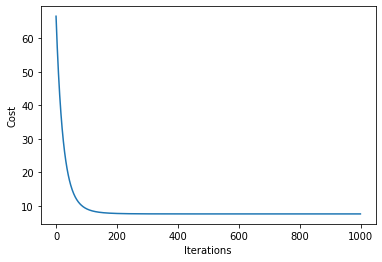

In [245]:
import matplotlib.pyplot as plt
plt.plot(resid)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [246]:
X = np.array(dt[['density','total sulfur dioxide']])
sclr = StandardScaler()
X = sclr.fit_transform(X)
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [249]:
print("From gradient descent",w)
print("From Sklearn",lreg.intercept_,lreg.coef_)

From gradient descent [ 6.39141485  4.41575428 -0.30382263]
From Sklearn 6.391414863209331 [ 4.41594057 -0.30400892]


### Maximum likelihood estimation - Linear Regression <br>
$ p(y|x) = N(y|f(x),\sigma^2) $ <br>
$ y=f(x)+\epsilon $ <br>
To find parameters $\theta$ that fit well <br>
$ y=x^T\theta + \epsilon $ <br>
$ \epsilon \approx N(0,\sigma^2) $ <br>
Since each of the elements in set y are conditionally independent <br>
$ p(y|x,\theta) = \prod \limits_{n=1}^N N(y_n|{x_n}^T\theta,\sigma^2) $ <br>
$ -log(p(y|x,\theta)) = -\sum \limits_{n=1}^N log(y_n|{x_n},\theta) $ Maximize for theta <br>
Since likelihood is gaussian, substituting for mean from model and variance in pdf of normal distibution <br>
$ likelihood L(\theta) = -\frac{1}{2\sigma^2} \sum \limits_{n=1}^N(y_n-{x_n}^T\theta)^2 $